In [1]:
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
experiments_without = pickle.load(open("final_results/experiments_all_without_new_max4.p", "rb"))
outcomes_without = pickle.load(open("final_results/outcomes_all_without_new_max4.p", "rb"))
df_all_without = pd.merge(experiments_without,pd.DataFrame(outcomes_without), left_index=True, right_index=True)

In [3]:
df_all_without

,r,scenario_var,p,scenario,policy,model,total_flow,fraction_captured_total,serviceable_fraction,served_fraction,optimal_facilities,non_zero_flows,add_nodes_used
0,70000,0,1,100,0,frlm,2.941841e+06,0.016316,0.103069,0.158305,"{'22637863': 0.0, '22638019': 0.0, '22638146':...","{('NLABL', 'NLRTM', 0): {'combinations': [['88...",0.0
1,70000,1,1,101,0,frlm,2.941841e+06,0.017516,0.103069,0.169945,"{'22637863': 0.0, '22638019': 0.0, '22638146':...","{('NLABL', 'NLRTM', 0): {'combinations': [['88...",0.0
2,70000,2,1,102,0,frlm,2.941841e+06,0.017516,0.103069,0.169945,"{'22637863': 0.0, '22638019': 0.0, '22638146':...","{('NLABL', 'NLRTM', 0): {'combinations': [['88...",0.0
3,110000,0,1,103,0,frlm,2.941841e+06,0.016316,0.409292,0.039865,"{'22637863': 0.0, '22638019': 0.0, '22638146':...","{('NLABL', 'NLRTM', 0): {'combinations': [['88...",0.0
4,110000,1,1,104,0,frlm,2.941841e+06,0.027191,0.409292,0.066435,"{'22637863': 0.0, '22638019': 0.0, '22638146':...","{('NLABL', 'NLRTM', 0): {'combinations': [['88...",0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,110000,1,100,104,99,frlm,2.941841e+06,0.409292,0.409292,1.000000,"{'22637863': 1.0, '22638019': 1.0, '22638146':...","{('NLABL', 'NLRTM', 0): {'combinations': [['88...",0.0
896,110000,2,100,105,99,frlm,2.941841e+06,0.409292,0.409292,1.000000,"{'22637863': 1.0, '22638019': 1.0, '22638146':...","{('NLABL', 'NLRTM', 0): {'combinations': [['88...",0.0
897,150000,0,100,106,99,frlm,2.941841e+06,0.716140,0.746216,0.959696,"{'22637863': 1.0, '22638019': 1.0, '22638146':...","{('NLABL', 'NLRTM', 0): {'combinations': [['88...",0.0
898,150000,1,100,107,99,frlm,2.941841e+06,0.716116,0.746216,0.959664,"{'22637863': 1.0, '22638019': 1.0, '22638146':...","{('NLABL', 'NLRTM', 0): {'combinations': [['88...",0.0


In [4]:
df_all_without['no_sited'] = df_all_without.apply(lambda x: sum(x.optimal_facilities.values()), axis=1)

In [5]:
# df_all ['% assigned flow of max'] = (df_all['total_flow']*df_all['fraction_captured_total'])/(df_all['no_sited_nodes'])
def determine_no_c_and_m(x):
    if x.scenario_var==0:
        c=2000
        m=5
    elif x.scenario_var==1:
        c=3333
        m=3
    else:
        c=10000
        m=1
    return tuple([c, m])

In [6]:
df_all_without['c'] = df_all_without.apply(lambda x: determine_no_c_and_m(x)[0], axis=1)
df_all_without['m'] = df_all_without.apply(lambda x: determine_no_c_and_m(x)[1], axis=1)

In [7]:
df_all_without['r']=df_all_without['r']/1000

## Reformatting
Now we want to establish a function, to find min number of stations to achieve max fraction captured total in all 9 scenarios

In [8]:
df1 = df_all_without.loc[(df_all_without.c==2000)&(df_all_without.m==5)&(df_all_without.r==150)]

In [9]:
def remove_redundant_rows(row, df):
    relevant_rows = df.loc[(df.c==row.c)&(df.m==row.m)&(df.r==row.r)]
    # are there any runs with same or equal fraction captured and with fewer stations?
    min_stations = relevant_rows.loc[round(relevant_rows.fraction_captured_total, 4)>=round(row.fraction_captured_total, 4)].p.min()
    if row.p==min_stations:
        return row['fraction_captured_total']
    else:
        return 0


In [10]:
df_all_without['fraction_captured_total'] = df_all_without.apply(lambda x: remove_redundant_rows(x, df_all_without),axis=1)

In [11]:
df_all_without = df_all_without.loc[df_all_without['fraction_captured_total']!=0]

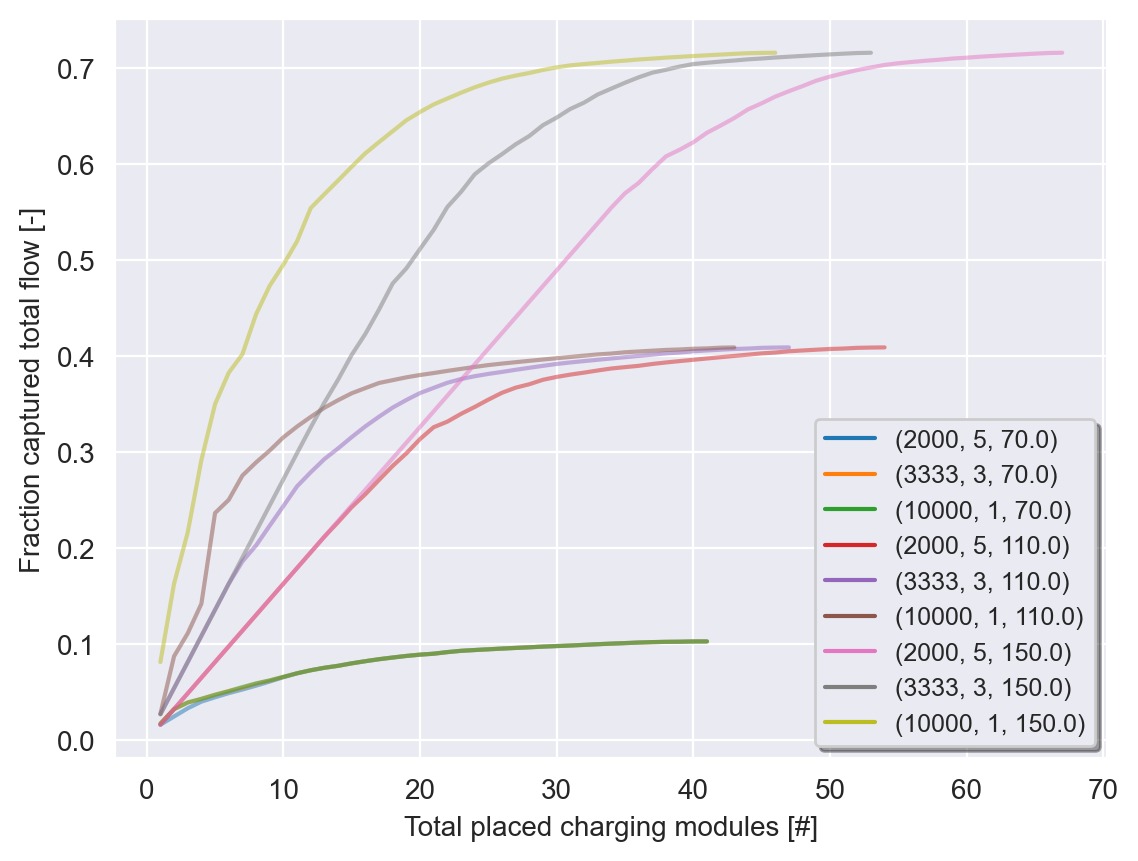

In [12]:
fig, ax = plt.subplots(dpi=200)
sns.lineplot(x='p', y='fraction_captured_total', hue=df_all_without[['c', 'm', 'r']].apply(tuple, axis=1), data=df_all_without, alpha=0.5)
ax.legend(fontsize=9, fancybox=True, shadow=True)
plt.xlabel('Total placed charging modules [#]')
plt.ylabel("Fraction captured total flow [-]")
plt.show()

# What are the outcomes with the most effective stations for each scenario?

In [13]:
df_without_best = pd.DataFrame()
for r in [70, 110, 150]:
    for m,c in [(1, 10000), (3, 3333), (5,2000)]:
        relevant_rows = df_all_without.loc[(df_all_without.c==c)&(df_all_without.m==m)&(df_all_without.r==r)]
        relevant_rows = relevant_rows.loc[relevant_rows.p==relevant_rows.p.max()]
        df_without_best = pd.concat([df_without_best, relevant_rows], ignore_index=True)

In [14]:
df_without_best

,r,scenario_var,p,scenario,policy,model,total_flow,fraction_captured_total,serviceable_fraction,served_fraction,optimal_facilities,non_zero_flows,add_nodes_used,no_sited,c,m
0,70.0,2,41,102,40,frlm,2.941841e+06,0.103065,0.103069,0.999965,"{'22637863': 1.0, '22638019': 1.0, '22638146':...","{('NLABL', 'NLRTM', 0): {'combinations': [['88...",0.0,41.0,10000,1
1,70.0,1,41,101,40,frlm,2.941841e+06,0.103065,0.103069,0.999965,"{'22637863': 1.0, '22638019': 1.0, '22638146':...","{('NLABL', 'NLRTM', 0): {'combinations': [['88...",0.0,41.0,3333,3
2,70.0,0,41,100,40,frlm,2.941841e+06,0.103065,0.103069,0.999965,"{'22637863': 1.0, '22638019': 1.0, '22638146':...","{('NLABL', 'NLRTM', 0): {'combinations': [['88...",0.0,41.0,2000,5
3,110.0,2,43,105,42,frlm,2.941841e+06,0.409263,0.409292,0.999928,"{'22637863': 1.0, '22638019': 1.0, '22638146':...","{('NLABL', 'NLRTM', 0): {'combinations': [['88...",0.0,43.0,10000,1
4,110.0,1,47,104,46,frlm,2.941841e+06,0.409263,0.409292,0.999928,"{'22637863': 1.0, '22638019': 1.0, '22638146':...","{('NLABL', 'NLRTM', 0): {'combinations': [['88...",0.0,47.0,3333,3
5,110.0,0,54,103,53,frlm,2.941841e+06,0.409263,0.409292,0.999928,"{'22637863': 1.0, '22638019': 1.0, '22638146':...","{('NLABL', 'NLRTM', 0): {'combinations': [['88...",0.0,54.0,2000,5
6,150.0,2,46,108,45,frlm,2.941841e+06,0.716140,0.746216,0.959696,"{'22637863': 0.0, '22638019': 0.0, '22638146':...","{('NLABL', 'NLRTM', 0): {'combinations': [['88...",0.0,46.0,10000,1
7,150.0,1,53,107,52,frlm,2.941841e+06,0.716106,0.746216,0.959651,"{'22637863': 0.0, '22638019': 0.0, '22638146':...","{('NLABL', 'NLRTM', 0): {'combinations': [['88...",0.0,53.0,3333,3
8,150.0,0,67,106,66,frlm,2.941841e+06,0.716131,0.746216,0.959684,"{'22637863': 0.0, '22638019': 0.0, '22638146':...","{('NLABL', 'NLRTM', 0): {'combinations': [['88...",0.0,67.0,2000,5


In [15]:
df_without_best_copy=df_without_best.copy()
df_without_best_copy.c = df_without_best_copy.c.apply(lambda x: "5x2 MW" if x==2000 else x)
df_without_best_copy.c = df_without_best_copy.c.apply(lambda x: "3x3.3 MW" if x==3333 else x)
df_without_best_copy.c = df_without_best_copy.c.apply(lambda x: "1x10 MW" if x==10000 else x)

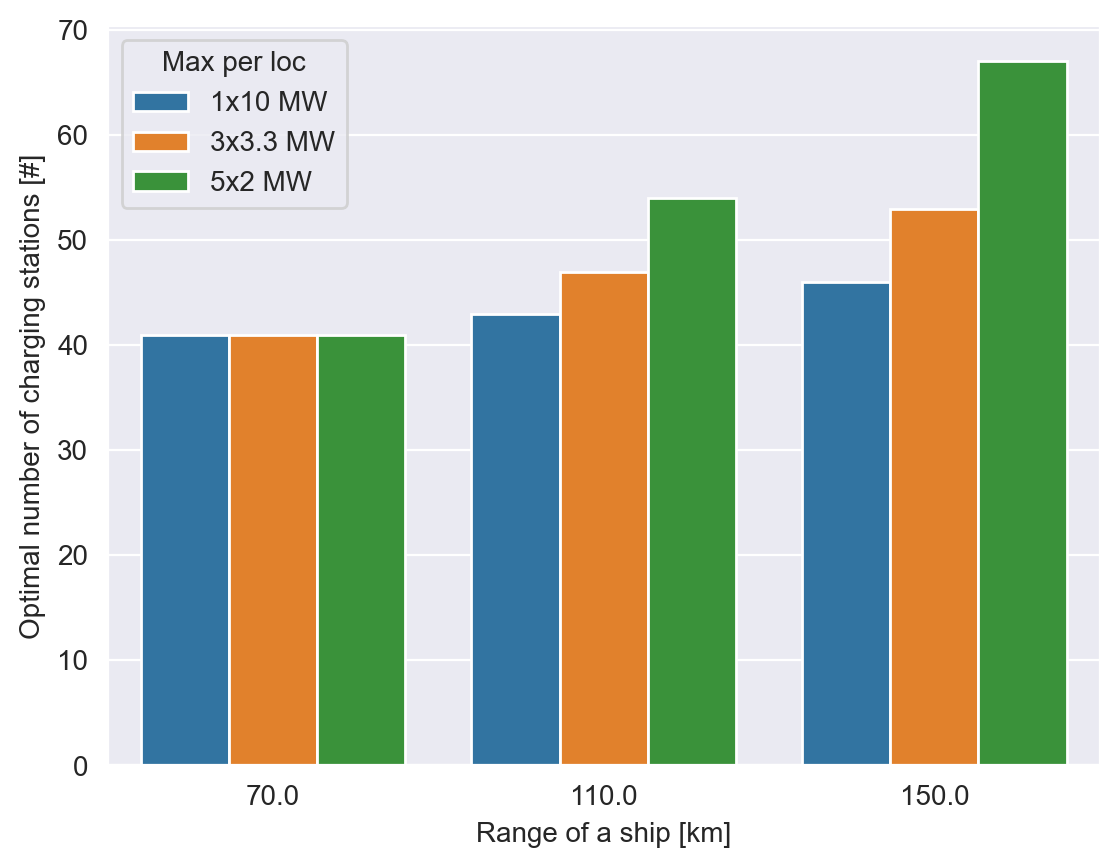

In [16]:
fig, ax = plt.subplots(dpi=200)
sns.barplot(x='r', y='p', data=df_without_best_copy, hue='c')
plt.xlabel('Range of a ship [km]')
plt.ylabel('Optimal number of charging stations [#]')
ax.legend(title="Max per loc")

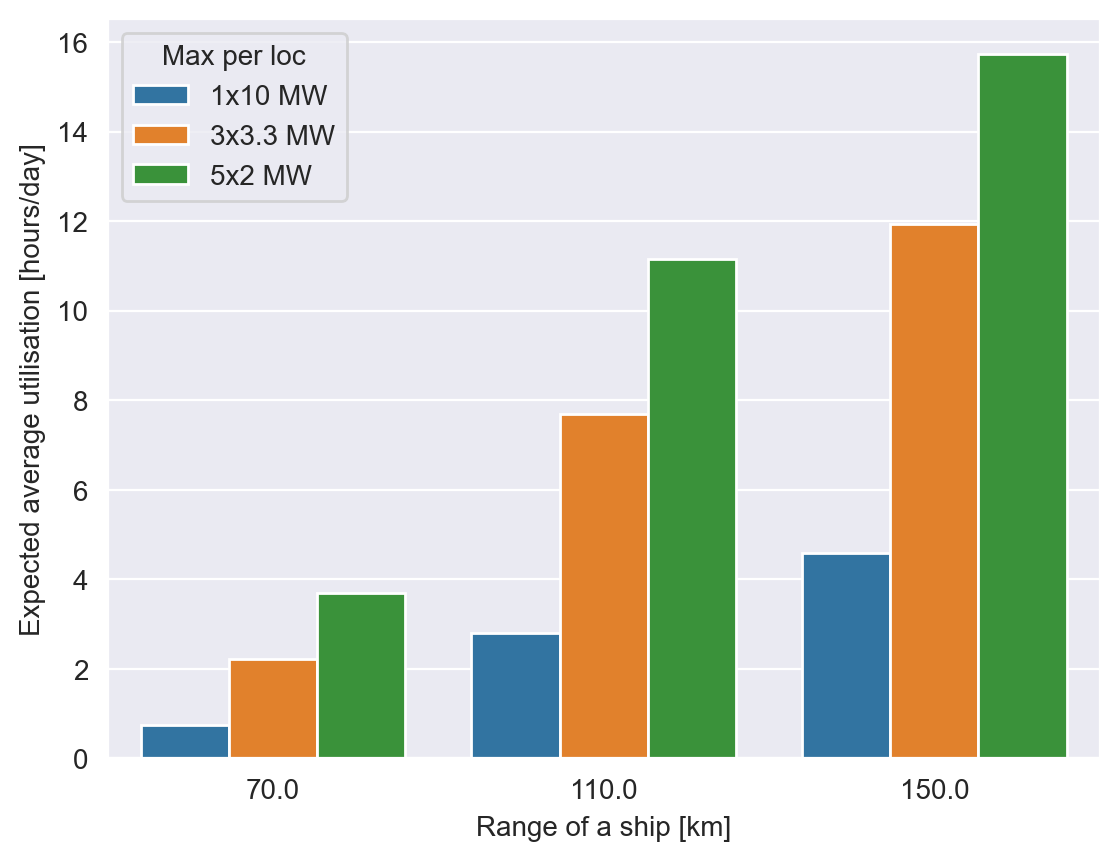

In [17]:
fig, ax = plt.subplots(dpi=200)
sns.barplot(x='r', y=(2941841.1*df_without_best_copy['fraction_captured_total'])/(df_without_best_copy['p']*df_without_best['c']), data=df_without_best_copy, hue='c')
plt.xlabel('Range of a ship [km]')
plt.ylabel('Expected average utilisation [hours/day]')
plt.legend(title='Max per loc')

In [18]:
df_without_best.sum()

C:\Users\Fabia\AppData\Local\Temp\ipykernel_7268\2838405340.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_without_best.sum()


r                                                         990.0
scenario_var                                                  9
p                                                           433
scenario                                                    936
policy                                                      424
model                      frlmfrlmfrlmfrlmfrlmfrlmfrlmfrlmfrlm
total_flow                                      26476570.714286
fraction_captured_total                                3.685362
serviceable_fraction                                    3.77573
served_fraction                                         8.87871
add_nodes_used                                              0.0
no_sited                                                  433.0
c                                                         45999
m                                                            27
dtype: object

In [19]:
pickle.dump(df_without_best, open('final_results/df_all_without_clean.p', 'wb'))

## With additional nodes

In [20]:
df_all_with = pd.DataFrame(pickle.load(open("final_results/max_4_in_combi_with.p", "rb")))

In [21]:
df_all_with.rename(columns={'max_stations':'p'}, inplace=True)

## Reformatting

In [22]:
df_all_with['no_sited'] = df_all_with.apply(lambda x: sum(x.optimal_facilities.values()), axis=1)
df_all_with['r']=df_all_with['r']/1000

In [23]:
df_all_with['fraction_captured_total'] = df_all_with.apply(lambda x: remove_redundant_rows(x, df_all_with),
                                                                 axis=1)
df_all_with = df_all_with.loc[df_all_with['fraction_captured_total'] != 0]

## Results with additional nodes

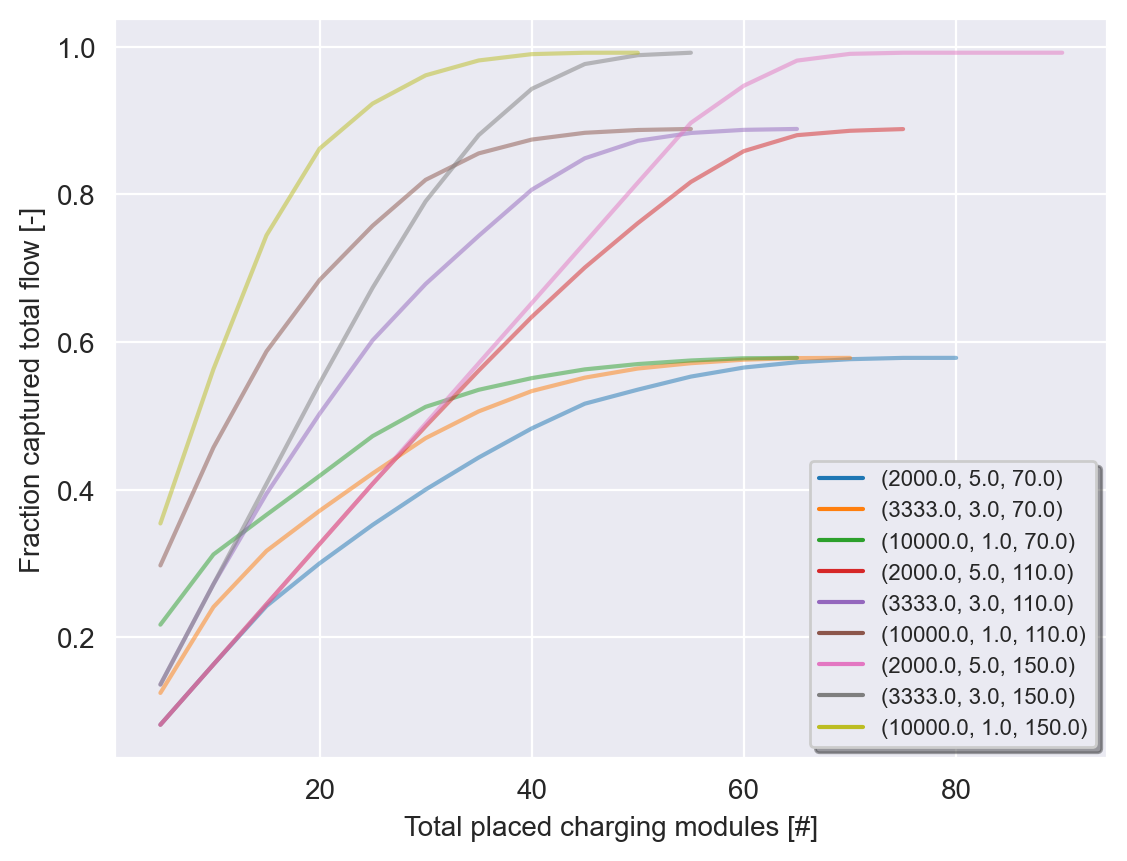

In [24]:
fig, ax = plt.subplots(dpi=200)
sns.lineplot(x='p', y='fraction_captured_total', hue=df_all_with[['c', 'm', 'r']].apply(tuple, axis=1), data=df_all_with.loc[df_all_with.served_fraction<1], alpha=0.5)
ax.legend(fontsize=8, fancybox=True, shadow=True)
plt.xlabel('Total placed charging modules [#]')
plt.ylabel("Fraction captured total flow [-]")
plt.show()

In [25]:
df_with_best = pd.DataFrame()
for r in [70, 110, 150]:
    for m, c in [(1, 10000), (3, 3333), (5, 2000)]:
        relevant_rows = df_all_with.loc[(df_all_with.c == c) & (df_all_with.m == m) & (df_all_with.r == r)]
        relevant_rows = relevant_rows.loc[relevant_rows.p == relevant_rows.p.max()]
        df_with_best = pd.concat([df_with_best, relevant_rows], ignore_index=True)

In [26]:
df_with_best

,r,p,c,m,fraction_captured_total,serviceable_fraction,served_fraction,optimal_facilities,non_zero_flows,add_nodes_used,no_sited
0,70.0,65,10000,1,0.578451,0.578467,0.999974,"{'101': 0.0, '102': 1.0, '103': 0.0, '104': 1....","{('NLABL', 'NLRTM', 0): {'combinations': [['88...",33.0,65.0
1,70.0,75,3333,3,0.578467,0.578467,1.000000,"{'101': 0.0, '102': 0.0, '103': 0.0, '104': 1....","{('NLABL', 'NLRTM', 0): {'combinations': [['88...",30.0,75.0
2,70.0,80,2000,5,0.578451,0.578467,0.999974,"{'101': 0.0, '102': 0.0, '103': 0.0, '104': 1....","{('NLABL', 'NLRTM', 0): {'combinations': [['88...",32.0,80.0
3,110.0,55,10000,1,0.888502,0.888502,1.000000,"{'101': 1.0, '102': 1.0, '103': 0.0, '104': 0....","{('NLABL', 'NLRTM', 0): {'combinations': [['88...",24.0,55.0
4,110.0,65,3333,3,0.888502,0.888502,1.000000,"{'101': 1.0, '102': 1.0, '103': 1.0, '104': 0....","{('NLABL', 'NLRTM', 0): {'combinations': [['88...",26.0,65.0
5,110.0,80,2000,5,0.888502,0.888502,1.000000,"{'101': 1.0, '102': 1.0, '103': 0.0, '104': 0....","{('NLABL', 'NLRTM', 0): {'combinations': [['88...",27.0,80.0
6,150.0,50,10000,1,0.991755,0.991757,0.999998,"{'101': 0.0, '102': 0.0, '103': 0.0, '104': 0....","{('NLABL', 'NLRTM', 0): {'combinations': [['88...",23.0,50.0
7,150.0,55,3333,3,0.991755,0.991757,0.999998,"{'101': 0.0, '102': 0.0, '103': 0.0, '104': 0....","{('NLABL', 'NLRTM', 0): {'combinations': [['88...",22.0,55.0
8,150.0,90,2000,5,0.991757,0.991757,1.000000,"{'101': 1.0, '102': 1.0, '103': 0.0, '104': 0....","{('NLABL', 'NLRTM', 0): {'combinations': [['88...",28.0,90.0


In [27]:
pickle.dump(df_with_best, open('data/data_9_scenarios.p', 'wb'))

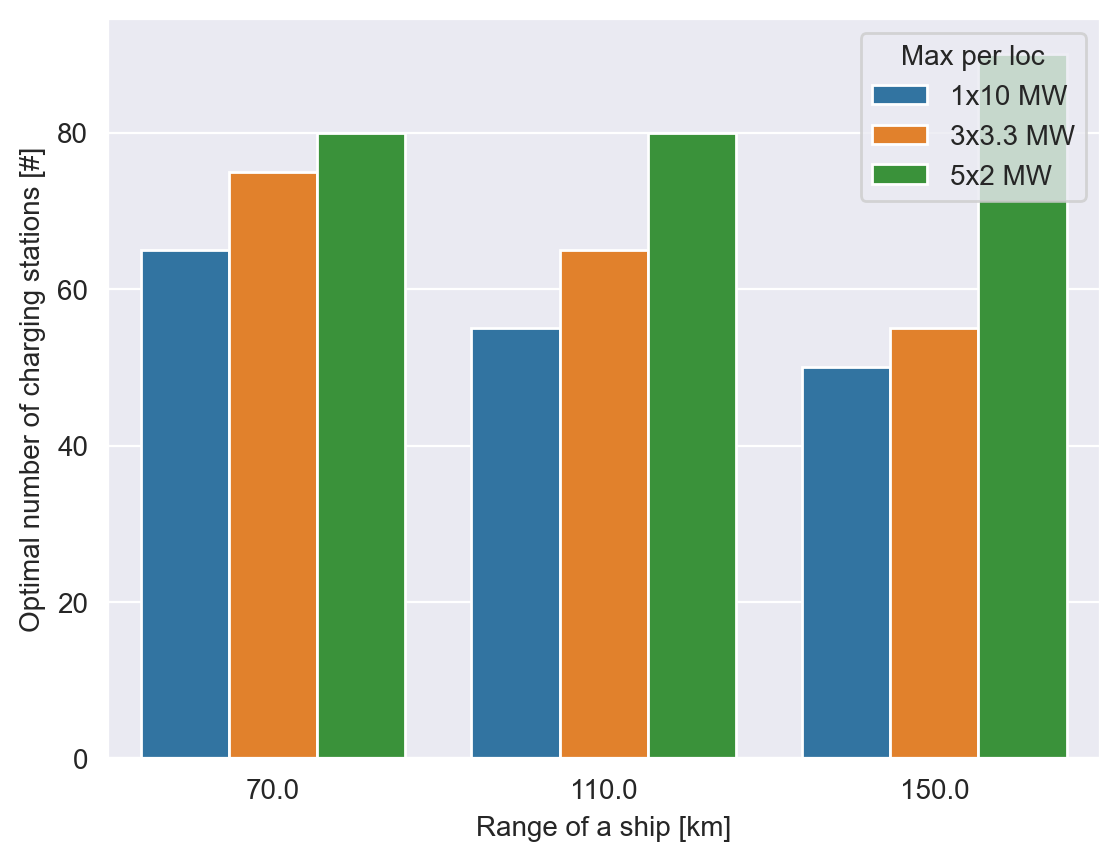

In [28]:
df_with_best_copy = df_with_best.copy()
df_with_best_copy.c = df_with_best_copy.c.apply(lambda x: "5x2 MW" if x == 2000 else x)
df_with_best_copy.c = df_with_best_copy.c.apply(lambda x: "3x3.3 MW" if x == 3333 else x)
df_with_best_copy.c = df_with_best_copy.c.apply(lambda x: "1x10 MW" if x == 10000 else x)

fig, ax = plt.subplots(dpi=200)
sns.barplot(x='r', y='p', data=df_with_best_copy, hue='c')
plt.xlabel('Range of a ship [km]')
plt.ylabel('Optimal number of charging stations [#]')
ax.legend(title="Max per loc")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


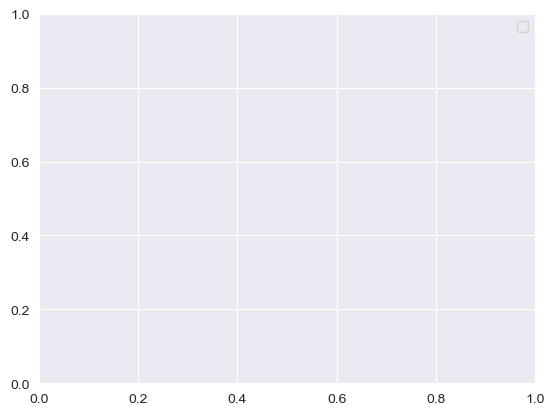

In [29]:
plt.legend()

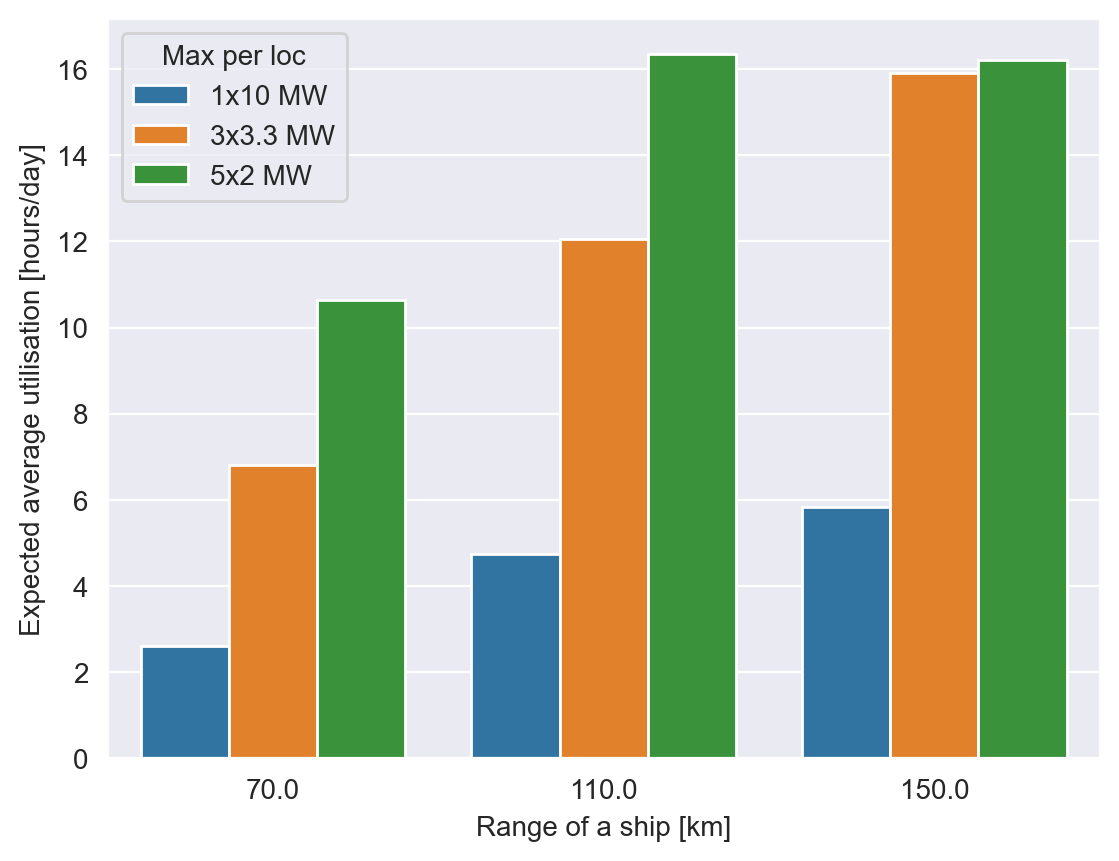

In [30]:
fig, ax = plt.subplots(dpi=200)
sns.barplot(x='r', y=(2941841.1*df_with_best_copy['fraction_captured_total'])/(df_with_best_copy['p']*df_with_best['c']), data=df_with_best_copy, hue='c')
plt.xlabel('Range of a ship [km]')
plt.ylabel('Expected average utilisation [hours/day]')
plt.legend(title='Max per loc')

In [31]:
pickle.dump(df_with_best, open('final_results/df_all_with_clean.p', 'wb'))

In [32]:
df_all_with.p.sum()

4495

In [33]:
df_all_without.p.sum()

10932

In [34]:
4495/10932

0.41117819246249543

In [35]:
df_with_best.optimal_facilities.apply(lambda x: sum(x.values())/len(max))

TypeError: object of type 'builtin_function_or_method' has no len()